# Evolutionary Computing - N-Queens Problem


**Goal**: Implement an Evolutionary Algorithm to solve for the N-Queens problem. Could be defined as minimization of maximization.

This assignment requires implementation of the main components of an evolutionary algorithm (i.e. *crossover*, *mutation*, *parent selection*, etc), and construction of your algorithm to solve the given problem. Try to make your EA as good performing as possible (solving also the bigger chess boards).

Please answer the `Questions` and implement coding `Tasks` by filling **PLEASE FILL IN** sections. *Documentation* of your code is also important. You can find the grading scheme in implementation cells.

  * Plagiarism is automatically checked and set to **0 points**

  * It is allowed to learn from external resources but copying is not allowed. If you use any external resource, please cite them in the comments (e.g. `# source: https://...../` (see `fitness_function`))

POINTS ARE ONLY FOR RELATIVE FEEDBACK, NOT AN ACTUAL GRADE.

**Setup**

**Install Prerequisites**

In [ ]:
# Run this cell to install the required libraries
%pip install numpy matplotlib scipy

**Imports**

In [1]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums
import random
# Set seed
np.random.seed(42)

**Plotting**

In [ ]:
# Enables inline matplotib graphs
# %matplotlib inline
%pip install PyQt5
# Comment the line above and uncomment the lines below to have interactive plots
# WARN: may cause dependency issues
#%matplotlib qt5
#%pip install PyQt5
#plt.ion()

In [2]:
def generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2,
    stds_experiment_2,
    n_columns,
    n_queens,
):
    """This helper function generates subplots for the experiments."""
    fig, axes = plt.subplots(nrows=1, ncols=n_columns, figsize=(18, 6))

    for i in range(len(avgs_experiment_1)):
        if avgs_experiment_2 is not None:
            # Plot data for subplot 1
            axes[i].plot(avgs_experiment_2[i], label="Experiment 2", color="green")
            axes[i].fill_between(
                np.arange(len(avgs_experiment_2[i])),
                avgs_experiment_2[i] - stds_experiment_2[i],
                avgs_experiment_2[i] + stds_experiment_2[i],
                alpha=0.2,
                color="green",
            )
            axes[i].set_ylim(bottom=0)

            if n_queens:
                axes[i].set_ylim(top=n_queens[i])

        axes[i].plot(avgs_experiment_1[i], label="Experiment 1", color="blue")
        axes[i].fill_between(
            np.arange(len(avgs_experiment_1[i])),
            avgs_experiment_1[i] - stds_experiment_1[i],
            avgs_experiment_1[i] + stds_experiment_1[i],
            alpha=0.2,
            color="blue",
        )
        axes[i].set_title(labels[i])
        axes[i].set_ylim(bottom=0)
        if n_queens:
            axes[i].set_ylim(top=n_queens[i])

    # Set common labels and title
    for ax in axes:
        ax.set_xlabel("Generations")
        ax.set_ylabel("Average Best Fitness")
        ax.legend()

    plt.tight_layout()

---

## Discrete Optimization - The N-Queens Problem (5 points total)

Implement an Evolutionary Algorithm for the **n-queens problem** - finding a placement of N queens on an N by N chess board, in which no queens are attacking each other.

Below is a visualization of a solution for the n-queens problem when n = 4. Observe that none of the queens are attacking each other.

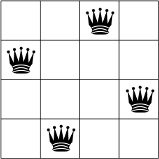


We would like to implement an EA that can find a solution for any given N by N board, by placing N queens where none of them attack each other.
It is usually better to start simple and generalize your implementation. So, let's start with the case when **N = 4**.

### **Question 1 (0-0.3 pt):**
* How do you represent a solution (a 4 queen placement on a 4x4 chess board)? In particular, specify the length of your genotype representation, what each gene (dimension) represents, and what values they can get.

**Answer:** The genotype representation (solution) can be represented as a 1 Dimensional array . Wherein, each element of the array represents the column number where the queen is placed, the row number of the queen is implicitly encoded as the index of the array (or vice versa). The length of the genotype representation should be N since we are suppoed to fit N queens in the chessboard. The value of each gene should span between 0 to N-1 (or 1 to N depending upon implementation).

### **Question 2 (0-0.2 pt):**
* Please write down an example representation and discuss what it means.

**Answer:** Consider a genotype that is defined by the variable solution as solution = [3,2,4,1]. This means that the queen in the first row is placed on the 3rd column as solution[i] = j where, i is the row index and j the column index of the position of thw queen in the chessboard. Similarly the queen in the 2nd, 3rd and the 4th row are placed in the 2nd, 4th and 1st column respectively.


### **Question 3 (0-0.2 pt):** 
* How many possible solutions can be generated in your representation?

**Answer:** Since the length of the genotype is N and each N can have N different column values it can at max contains N^N (4^4= 256) solutions. But the number of feasible solutions when we implement the row and column constraints should be (4!) 24 and once we take into account the diagonal constraints between the queens it leaves us with only 2 feasible solutions 

---

### **Task 1 (0-0.20-0.40-0.80):** 
Implementation of solution encoding, visualization and evaluation functions.

In [3]:
################################################################


# PLEASE FILL IN - how do you represent your solution?
example_solution =[2,0,3,1]


################################################################

Write a function below that can visualize your solution. For instance, the output may look like below, a matrix representing the 4x4 chess board where each Q indicates a queen placement and dots are empty cells. <br>
<br>
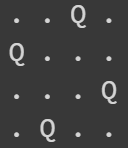


In [10]:
def visualize_solution(solution):
    """Visualize the placement of queens on the chessboard."""

    ################################################################
    for i in range (len(solution)):
        for j in range(len(solution)):
            if j == solution[i]:
                print('Q', end=' ')
            else:
                print('.', end= ' ')
        print()
    ################################################################

Write the evaluation function to assess how good your solution is.

In [11]:
def evaluate_solution_n_queens(solution):
    """Calculate the fitness of an solution."""
    ################################################################

    # PLEASE FILL IN
    conflicting_queens = 0 
    for i1 in range(len(solution)-1):
        for i2 in range(len(solution)):
            if (i1<i2):
                j1 = solution[i1]
                j2 = solution[i2] 
                x_diff = abs(i1-i2)
                y_diff = abs(j1-j2)
                if(y_diff == 0):
                    conflicting_queens += 1
                elif(x_diff == y_diff):
                    conflicting_queens += 1 
    fitness = len(solution) - conflicting_queens

    ################################################################

    return fitness

Try your implementations to see if your solution encoding matches to visualization and whether the fitness is computed correctly.

In [12]:
#################################
# Grading
# 0 pts: No attempt, representation discussed does not match with the implementation and visualization, fitness is not correct.
# 0.20 : Solution representation matches with visualization, fitness computation is not correct, no explanation in the code.
# 0.50 : Solution representation matches with visualization, fitness computation is correct, no explanation in the code.
# 0.80 : Solution representation matches with visualization, fitness computation is correct, the implementation explained well.
################################################################


###################### DO NOT CHANGE #########################
print("Genotype (solution representation):", example_solution)
print("Phenotype (solution visualization):")
visualize_solution(example_solution)
print("Solution fitness", evaluate_solution_n_queens(example_solution))
###################### DO NOT CHANGE #########################

Genotype (solution representation): [2, 0, 3, 1]
Phenotype (solution visualization):
. . Q . 
Q . . . 
. . . Q 
. Q . . 
Solution fitness 4


---



### **Task 2 (0-0.4-0.8-1.2-1.6 pt):** 
Write an evolutionary algorithm that can initialize a population of solutions and finds N queen placement to NxN board optimizing the number of attacks (could be minimization or maximization based on your evaluation function of the solutions).

In [8]:
#################################
# Grading
# 0 pts if the code does not work, code works but it is fundamentally incorrect
# 0.4 pts if the code works but some functions are incorrect and it is badly explained
# 0.8 pts if the code works but some functions are incorrect but it is explained well
# 1.2 pts if the code works very well aligned with the task without any mistakes, but it is badly explained
# 1.6 pts if the code works very well aligned with the task without any mistakes, and it is well explained
################################################################


def initialization_n_queens(population_size, num_of_dims):
    """Generate a population of solutions."""
    ################################################################

    # PLEASE FILL IN
    x = []
 
    for _ in range(population_size):
        available_cols = [j for j in range(num_of_dims)] # columns that havent been used up yet 
        solution =[-1 for _ in range(num_of_dims)] # empty solution initializing it cause appending in for loop is slow
        for i in range(num_of_dims):
            choice = random.choice(available_cols) # pick random column 
            solution[i] = choice # place the queen in that column
            available_cols.remove(choice) # remove column to avoid duplicates
        x.append(solution)

    ################################################################

    return x


def evaluation_n_queens(x):
    """Evaluate the whole population and return the fitness of each."""
    return [evaluate_solution_n_queens(solution) for solution in x]


def crossover_n_queens(x_parents, p_crossover):
    """Perform crossover to create offsprings."""

    ################################################################

    # YOUR CODE HERE
    # we try to implement PMX crossover 
    offspring = []
    size = len(x_parents[0])
    #Loop over all unique pairs of parents 
    for i in range(len(x_parents)-1):
        for j in range(len(x_parents)):
            if (i<j):# Avoids repeating same pairs
                if (random.random() < p_crossover): #checks crossover probabilistically 
                    crossover_idx1, crossover_idx2 = sorted(random.sample(range(size),2)) # select two crossover points and sort 
                    child = [-1 for _ in range(size)]
                    child[crossover_idx1:crossover_idx2] = x_parents[i][crossover_idx1:crossover_idx2]# Copy the slice from the first parent to the child 
                    map = {x_parents[i][k]: x_parents[j][k] for k in range (crossover_idx1, crossover_idx2)} # Create a map between the indexes and values of the two parents to implement PMX crossover
                    for idx in range(size):# fill the remaining positions in the child 
                        if idx >= crossover_idx1 and idx < crossover_idx2:
                            continue # positions already filled are skipped
                        candidate = x_parents[j][idx]
                        while candidate in map and candidate in child: # resolve conflicts if the candidate is already in child 
                            candidate = map[candidate]
                        child[idx] = candidate # place the candidate in child 
                    offspring.append(child)
            else: 
                # offspring.append(child)
                offspring.append(x_parents[i][:]) # for the case no crossover happens then the first parent is the offspring


    ################################################################

    return offspring


def mutation_n_queens(x, mutation_rate):
    """Apply mutation to an individual."""

    ################################################################

    # YOUR CODE HERE
    # Applied inverse mutation 
    for i in range(len(x)):
        if random.random() < mutation_rate: # Check if stochastically if mutation occurs 
            idx1, idx2 = sorted(random.sample(range(len(x[i])),2)) # Sample and sort two indexes 
            x[i][idx1:idx2] =x[i][idx1:idx2][::-1] # Reverse the solution between the two indexes 


    ################################################################

    return x


def parent_selection_n_queens(x, f):
    """Select parents for the next generation. Returns a list of parents and a list of their fitness values."""

    ################################################################

    # YOUR CODE HERE
    x_parents = []
    f_parents = []
    tot_fitness = sum(f)
    cum_probs = []
    cum_sum = 0
    for fit in f :
        cum_sum += fit/tot_fitness
        cum_probs.append(cum_sum) # calculate normalized cumulative probability 
    for _ in range(len(x)):
        r = random.random()
        for idx, prob in enumerate(cum_probs):
            if r <= prob: # check which  probability interval r falls in 
                x_parents.append(x[idx][:])  # copy the chosen solution and fitness and append 
                f_parents.append(f[idx])
                break        

    ####################################
    return x_parents, f_parents


def survivor_selection_n_queens(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation. Returns a list of survivors and their fitness values."""

    ################################################################

    # YOUR CODE HERE
    population_size = len(x)
    x = x + x_offspring 
    f = f + f_offspring  
    while len(x) > population_size: # Remove lowest fitness individuals until population size is restored
        min_idx = f.index(min(f))   # Find fitness of the worst individual and remove it from the list 
        x.pop(min_idx)
        f.pop(min_idx)


    ################################################################

    return x, f


def ea_n_queens(population_size, max_fit_evals, p_crossover, m_rate, num_of_dims):
    # Calculate the maximum number of generations
    max_generations = int(max_fit_evals / population_size)

    # Initialize population and calculate fitness
    x = initialization_n_queens(population_size, num_of_dims)
    f = evaluation_n_queens(x)

    # Get best individual and append to list
    idx = np.argmax(f)
    x0_best = x[idx]
    f0_best = f[idx]
    x_best = [x0_best]
    f_best = [f0_best]

    # Loop over the generations
    for _ in range(max_generations - 1):
        # Select population size parents
        x_parents, f_parents = parent_selection_n_queens(x, f)
        x_offspring = crossover_n_queens(x_parents, p_crossover)
        x_offspring = mutation_n_queens(x_offspring, m_rate)
        f_offspring = evaluation_n_queens(x_offspring)
        x, f = survivor_selection_n_queens(
            x_parents, f_parents, x_offspring, f_offspring
        )

        # Find the best individual in current generation and add to the list
        idx = np.argmax(f)
        xi_best = x[idx]
        fi_best = f[idx]
        if fi_best > f_best[-1]:
            x_best.append(xi_best)
            f_best.append(fi_best)
        else:
            x_best.append(x_best[-1])
            f_best.append(f_best[-1])

        # Append the best individual to the list
        # f_best.append(fi_best)
        # x_best.append(xi_best)
    return x_best, f_best

---
**Results:**

Run the code below to run an EA for N=8, 16 and 32, and visualize the best solutions found.
Note, it is not allowed to change the hyper parameters


In [12]:
print("Case when N=8:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 8)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=8:
Best fitness: 8
Best solution found:
. . . . . . Q . 
. . Q . . . . . 
. . . . . . . Q 
. Q . . . . . . 
. . . . Q . . . 
Q . . . . . . . 
. . . . . Q . . 
. . . Q . . . . 


In [13]:
print("Case when N=16:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 16)


print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=16:
Best fitness: 15
Best solution found:
. . Q . . . . . . . . . . . . . 
. . . . . . Q . . . . . . . . . 
. . . . . . . . . . . Q . . . . 
. Q . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . Q . 
. . . . . Q . . . . . . . . . . 
. . . Q . . . . . . . . . . . . 
. . . . . . . . Q . . . . . . . 
. . . . . . . . . . . . Q . . . 
. . . . . . . . . . . . . . . Q 
. . . . Q . . . . . . . . . . . 
Q . . . . . . . . . . . . . . . 
. . . . . . . Q . . . . . . . . 
. . . . . . . . . Q . . . . . . 
. . . . . . . . . . . . . Q . . 
. . . . . . . . . . Q . . . . . 


In [14]:
print("Case when N=32:")
x_best, f_best = ea_n_queens(100, 10000, 0.5, 0.1, 32)

print("Best fitness:", f_best[-1])
print("Best solution found:")
visualize_solution(x_best[-1])

Case when N=32:
Best fitness: 30
Best solution found:
. . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . 
. . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . 
. . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . 
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . 
. . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . 
. . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . 
. . . . . . . . . Q . . . . . . . . 

---

### Plotting the average performance of the algorithm
Use the cells below to plot the results of your algorithm. The plots should show average and std of 10 runs of EA for n-queens problem for N=8, 16, 32.

In [15]:
def calculate_mean_std(f_best):
    """This is a helper function to calculate the mean and standard deviation of the best fitness values."""
    f_best = np.array(f_best)
    avg = np.mean(f_best, axis=0)
    std = np.std(f_best, axis=0)
    return avg, std

In [16]:
def run_experiment_n_queens(population_size, p_crossover, m_rate):

    # These are the hyperparameters of your evolutionary algorithm. You are not allowed to change them.
    runs = 10
    max_fit_evals = 10000


    fitness_8 = []
    fitness_16 = []
    fitness_32 = []



    for run in range(runs):
        print("Run: ", run)

        _, f_best_8 = ea_n_queens(
            population_size[0], max_fit_evals, p_crossover[0], m_rate[0], num_of_dims=8
        )
        _, f_best_16 = ea_n_queens(
            population_size[1], max_fit_evals, p_crossover[1], m_rate[1], num_of_dims=16
        )
        _, f_best_32 = ea_n_queens(
            population_size[2], max_fit_evals, p_crossover[2], m_rate[2], num_of_dims=32
        )
        fitness_8.append(f_best_8)
        fitness_16.append(f_best_16)
        fitness_32.append(f_best_32)

    avg_8, std_8 = calculate_mean_std(fitness_8)
    avg_16, std_16 = calculate_mean_std(fitness_16)
    avg_32, std_32 = calculate_mean_std(fitness_32)

    avgs = [avg_8, avg_16, avg_32]
    stds = [std_8, std_16, std_32]
    all_runs = [fitness_8, fitness_16, fitness_32]

    return avgs, stds, all_runs

In [17]:
population_size = [100, 100, 100]  # not allowed to change
p_crossover = [0.8, 0.8, 0.8]  # not allowed to change
m_rate = [0.1, 0.1, 0.1]  # not allowed to change

avgs_experiment_1, stds_experiment_1, all_runs_experiment_1 = run_experiment_n_queens(
    population_size, p_crossover, m_rate
)

Run:  0
Run:  1
Run:  2
Run:  3
Run:  4
Run:  5
Run:  6
Run:  7
Run:  8
Run:  9


In [18]:
#check for the best fitness found for each problem

f_8, f_16, f_32 = all_runs_experiment_1

print("Best fitness found for N = 8: ", max(max(f_8)))
print("Best fitness found for N = 16: ", max(max(f_16)))
print("Best fitness found for N = 32: ", max(max(f_32)))

Best fitness found for N = 8:  8
Best fitness found for N = 16:  15
Best fitness found for N = 32:  30


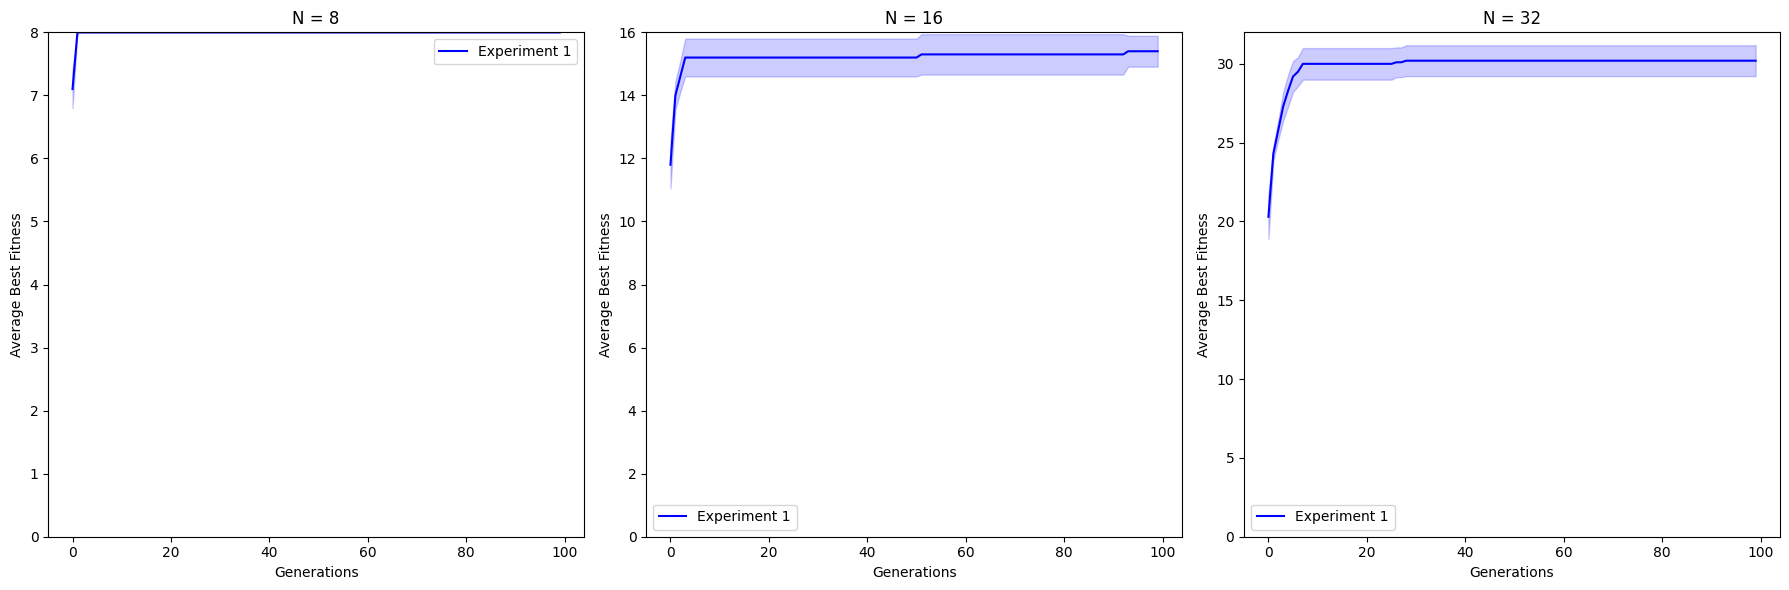

In [19]:
labels = ["N = 8", "N = 16", "N = 32"]

generate_subplot_function(
    avgs_experiment_1,
    stds_experiment_1,
    labels,
    avgs_experiment_2=None,
    stds_experiment_2=None,
    n_columns=3,
    n_queens=[8, 16, 32],
)

### **Question 4 (0-0.4 pt):** 
* Describe the average performance of the algorithm. What was the maximum average fitness found for each case? Do you see any differences between the problem cases?

**Answer**: 
The average performance is the average fitness of the population during the end of the algorithm, it tells us how good the typical solution is instead of just querying the best one and is a better representation of performance than choosing the best fit solution.
The Maximum average fitness found for N = 8, 16 and 32 are 8 , 15 and 30 respectively. It can be observer as the value of N increases the algorithm strugles to find a perfect solution so the average fitness decreases slightly relative to the possible. A reason for this could be the larger solution space and it would require more runs to find the optimal solution but since we kept the number of runs constant the algorithm performed perfectly for smaller values of N but the performance reduces for medium (N=16) and a slightly larger (N =32).
